![example](images/director_shot.jpeg)

# Project Hollywood

**Authors:** Arthur Kim, Mia Fryer, Eddie Lin, Ian Sharff

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

The client wants to develop original video content and recently established a movie studio.

In order for the client to successfully compete with its competitors, the client tasked Team 3 to determine three recommendations for the client to determine what type of films to create

***
Questions to consider:
* What are the top genres that the client should consider?
* What metrics should be analyzed to determine the top genres?
* What other category besides genre should be considered?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

The data was obtained from four sources (IMDb, TMDb, Rotten Tomatoes, and The Numbers) and delivered in CSV format. 

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from tools.data_preparation import *

### Exploring the raw data

In [4]:
!ls data

bom.movie_gross.csv       imdb.title.crew.csv       rt.reviews.tsv
imdb.name.basics.csv      imdb.title.principals.csv tmdb.movies.csv
imdb.title.akas.csv       imdb.title.ratings.csv    tmdb_genre_ids.json
imdb.title.basics.csv     rt.movie_info.tsv         tn.movie_budgets.csv


### INDIVIDUAL FILE CLEANS

In [5]:
# rt.reviews.tsv
clean_rt_reviews()

,id,review,fresh,top_critic,date
0,3,A distinctly gallows take on contemporary fina...,1,0,2018-11-10
1,3,It's an allegory in search of a meaning that n...,0,0,2018-05-23
2,3,... life lived in a bubble in financial dealin...,1,0,2018-01-04
3,3,Continuing along a line introduced in last yea...,1,0,2017-11-16
4,3,... a perverse twist on neorealism...,1,0,2017-10-12
...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,1,1,2002-09-24
54428,2000,NaN,0,0,2005-09-21
54429,2000,NaN,0,0,2005-07-17
54430,2000,NaN,0,0,2003-09-07


In [6]:
# rt.movie_info.tsv
clean_rt_movie_info()

,id,synopsis,rating,genre,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,"(Action and Adventure, Classics, Drama)",1971-10-09,2001-09-25,104.0
1,3,"New York City, not-too-distant-future: Eric Pa...",R,"(Drama, Science Fiction and Fantasy)",2012-08-17,2013-01-01,108.0
2,5,Illeana Douglas delivers a superb performance ...,R,"(Drama, Musical and Performing Arts)",1996-09-13,2000-04-18,116.0
3,6,Michael Douglas runs afoul of a treacherous su...,R,"(Drama, Mystery and Suspense)",1994-12-09,1997-08-27,128.0
4,7,NaN,NR,"(Drama, Romance)",NaT,NaT,200.0
...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,"(Action and Adventure, Horror, Mystery and Sus...",2006-08-18,2007-01-02,106.0
1556,1997,The popular Saturday Night Live sketch was exp...,PG,"(Comedy, Science Fiction and Fantasy)",1993-07-23,2001-04-17,88.0
1557,1998,"Based on a novel by Richard Powell, when the l...",G,"(Classics, Comedy, Drama, Musical and Performi...",1962-01-01,2004-05-11,111.0
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,"(Comedy, Drama, Kids and Family, Sports and Fi...",1993-04-01,2002-01-29,101.0


In [7]:
# tn.movie_budgets.csv
clean_tn_budgets()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0
5778,79,1999-04-02,Following,6000,48482,240495
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0


In [8]:
# bom.movie_gross.csv
clean_bom_gross()

,title,studio,domestic_gross,foreign_gross,year,cleaned_title
0,Toy Story 3,BV,415000000.0,652000000.0,2010,toystory3
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,aliceinwonderland2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,harrypotterandthedeathlyhallowspart1
3,Inception,WB,292600000.0,535700000.0,2010,inception
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,shrekforeverafter
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018,thequake
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018,edwardii2018rerelease
3384,El Pacto,Sony,2500.0,0.0,2018,elpacto
3385,The Swan,Synergetic,2400.0,0.0,2018,theswan


In [9]:
# tmdb.movies.csv()
clean_tmdb_movies()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,Adventure,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,Fantasy,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,Family,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,Fantasy,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,Adventure,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
...,...,...,...,...,...,...,...,...,...
26515,Family,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
26515,Adventure,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
26515,Action,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
26516,Thriller,309885,en,The Church,0.600,2018-10-05,The Church,0.0,1


In [10]:
# imdb.name.basics.csv, imdb.title.akas.csv, imdb.title.principals.csv, imdb.title.ratings.csv

# These files did not need extra processing
clean_imdb_name_basics()
clean_imdb_title_akas()
clean_imdb_title_crew()
clean_imdb_title_principals()
clean_imdb_title_ratings()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [11]:
# imdb.title.basics
clean_imdb_title_basics()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,cleaned_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",sunghursh
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",onedaybeforetherainyseason
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,theothersideofthewind
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",sabsebadasukh
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",thewanderingsoapopera
...,...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War",thesecretofchina
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,kuambillagihatiku
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,rodolphoteóphiloolegadodeumpioneiro
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,dankyavardanka


### CLEANED FILE MERGES

In [30]:
# Rotten Tomatoes
ratings_by_total = merge_rt_data(focus='rating_popularity', by='total_positive')
ratings_by_percent = merge_rt_data(focus='rating_popularity', by='total_positive')


,rating,total_references,total_positive,percent_positive
0,R,24367,15559,0.638528
1,PG-13,18003,9302,0.516692
2,PG,8246,5286,0.641038
3,NR,2650,2045,0.771698
4,G,1071,774,0.722689


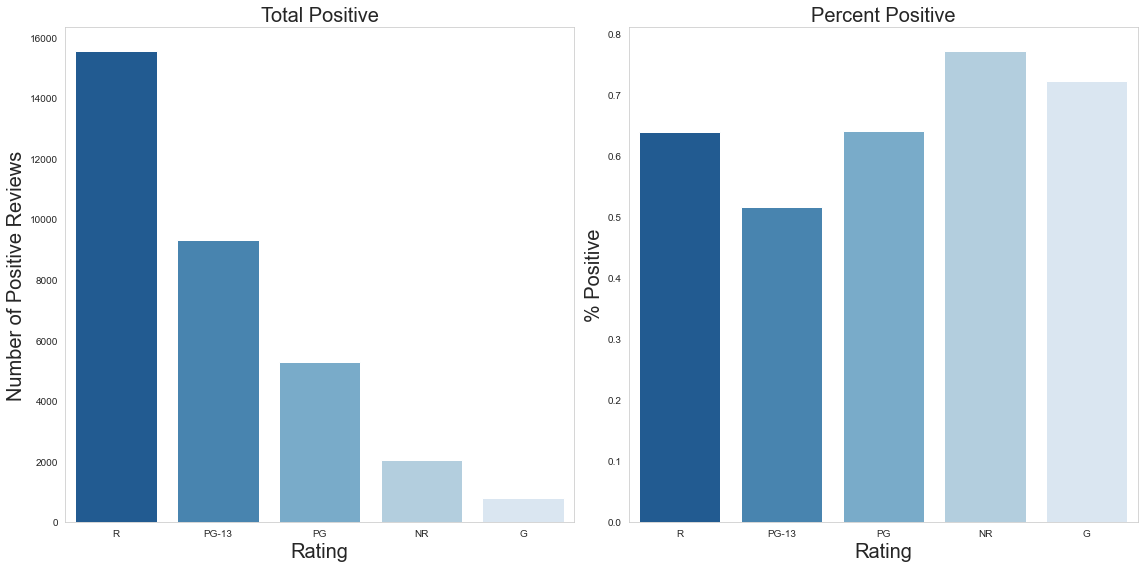

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
f, (ax1, ax2) = plt.subplots(figsize=(16,8), ncols=2)
seaborn_grid = sns.set_style("whitegrid", {'axes.grid' : False})


sns.barplot(data=ratings_by_total, x='rating',y= 'total_positive', palette="Blues_r", ax=ax1)
ax1.set_xlabel('Rating', size=20)
ax1.set_ylabel('Number of Positive Reviews', size=20)
ax1.set_title('Total Positive', size=20)

sns.barplot(data=ratings_by_total, x='rating',y= 'percent_positive', palette="Blues_r", ax=ax2)
ax2.set_xlabel('Rating', size=20)
ax2.set_ylabel('% Positive', size=20)
ax2.set_title('Percent Positive', size=20)

             
plt.savefig('ian.png', dpi=80, bbox_inches='tight')

Text(0, 0.5, '% Positive')

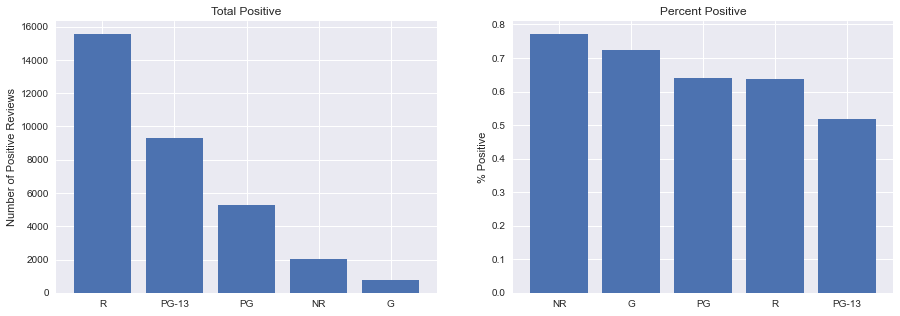

In [29]:
# ROUGH PLOT FOR BAR GRAPH
fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].bar(height=ratings_by_total['total_positive'], x=ratings_by_total.index)
ax[0].set_title('Total Positive')
ax[0].set_ylabel('Number of Positive Reviews')

ax[1].bar(height=ratings_by_percent['percent_positive'], x=ratings_by_percent.index)
ax[1].set_title('Percent Positive')
ax[1].set_ylabel('% Positive')

In [ ]:
# IM

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [6]:
# Here you run your code to clean the data

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***